AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [23]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 
df = pd.read_csv(url)

first_10 = df.head(10)
last_20 = df.tail(20)

from io import StringIO
buffer = StringIO()
df.info(buf=buffer)
dataset_info = buffer.getvalue()

description = df.describe()

print("\nFirst 10 Rows:")
print(first_10)

print("\nLast 20 Rows:")
print(last_20)

print("\nDataset Information:")
print(dataset_info)

print("\nDataset Description:")
print(description)



First 10 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timot

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Age         177
Cabin       687
Embarked      2
dtype: int64


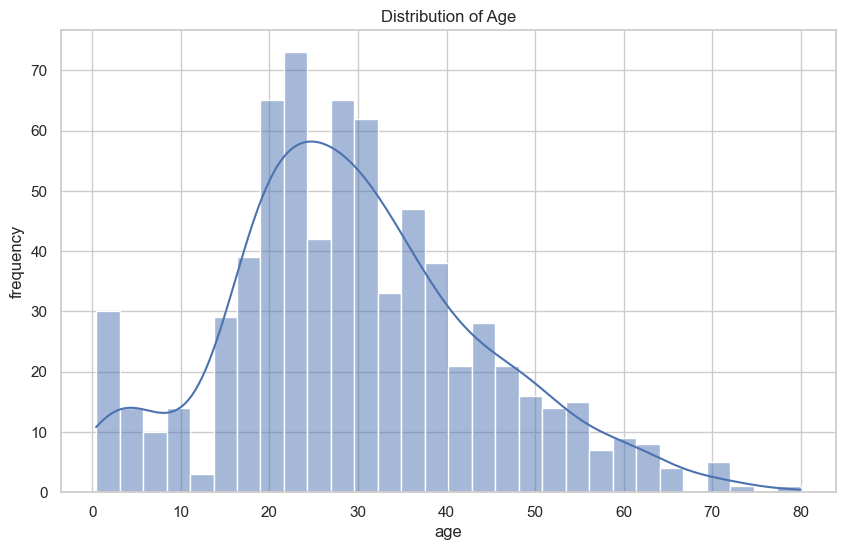

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10360\4026414357.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(central_tendency, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10360\4026414357.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [24]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 
df = pd.read_csv(url)

missing_values = df.isnull().sum()  
print(missing_values[missing_values > 0])  

plt.figure(figsize=(10, 6))  
sns.histplot(df['Age'].dropna(), bins=30, kde=True)  
plt.title('Distribution of Age')  
plt.xlabel('age')  
plt.ylabel('frequency')  
plt.show() 

central_tendency = df['Age'].median()  

df['Age'].fillna(central_tendency, inplace=True) 

df['Cabin'].fillna('Unknown', inplace=True)  

mode_embarked = df['Embarked'].mode()[0]  
df['Embarked'].fillna(mode_embarked, inplace=True)  

print(df['Survived'].unique())  
df = df[df['Survived'].isin([0, 1])]  

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')  

df['Fare'].fillna(df['Fare'].median(), inplace=True) 

print(df.info())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


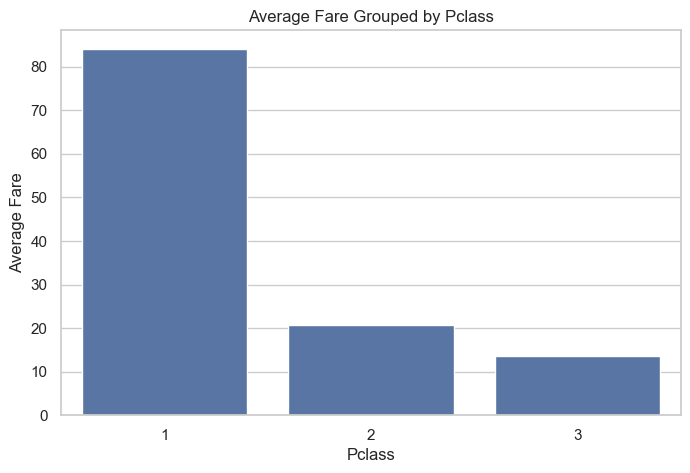

      Sex       Fare
0  female  44.479818
1    male  25.523893


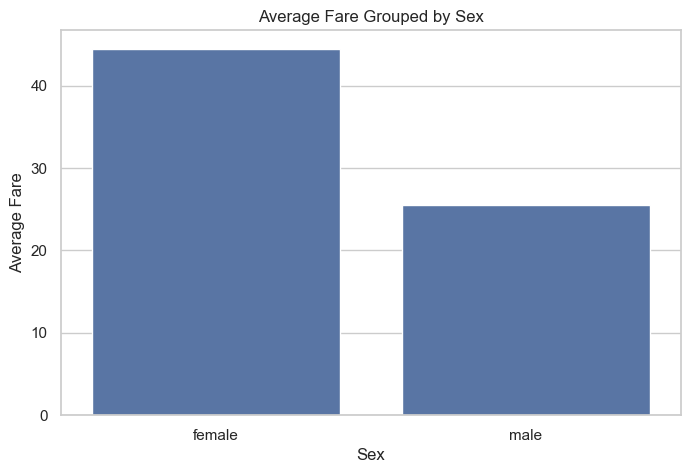

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 
df = pd.read_csv(url)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()
print(average_fare_by_pclass)

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass)
plt.title('Average Fare Grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

average_fare_by_sex = df.groupby('Sex')['Fare'].mean().reset_index()
print(average_fare_by_sex)

plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Fare', data=average_fare_by_sex)
plt.title('Average Fare Grouped by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

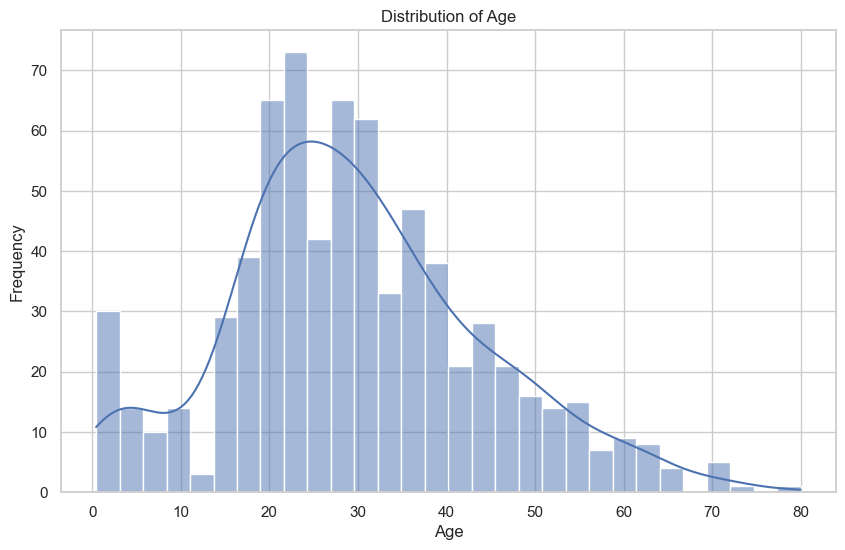

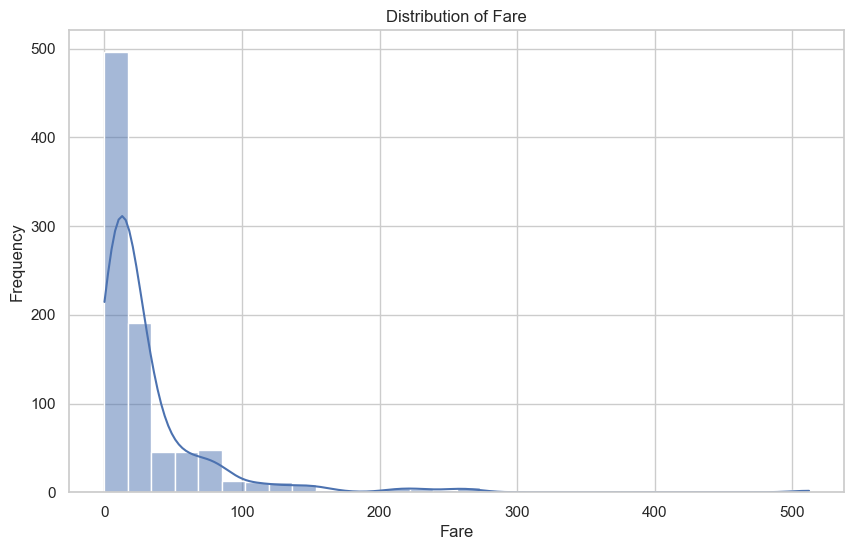

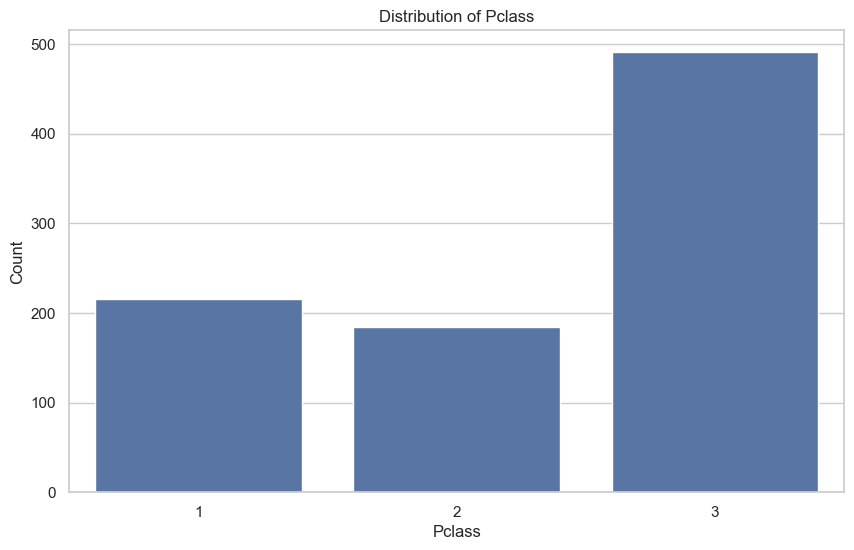

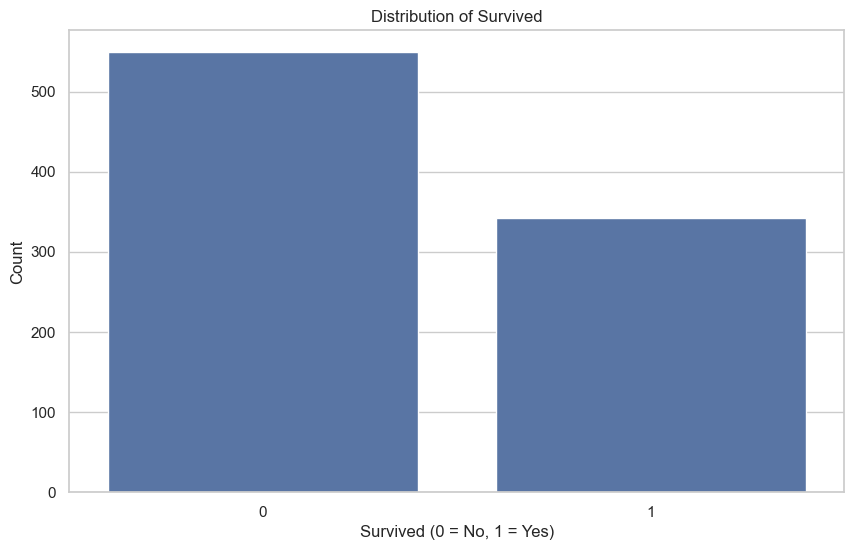

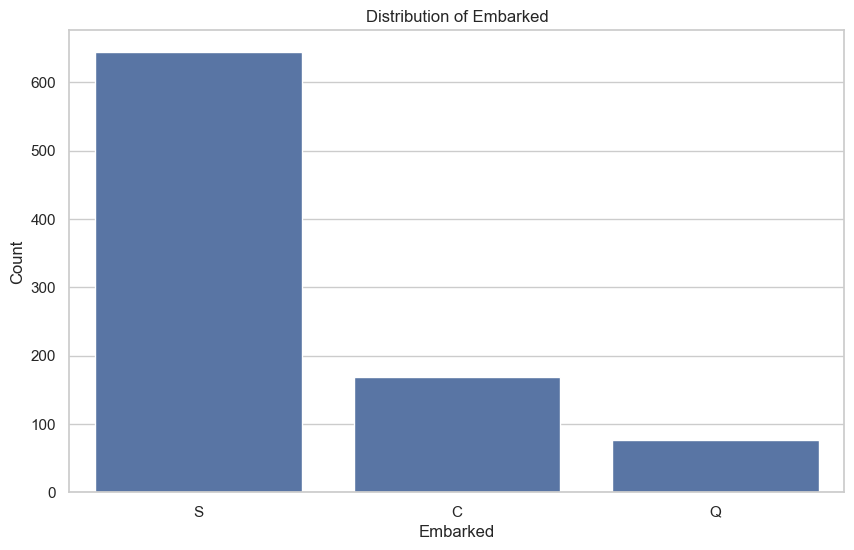

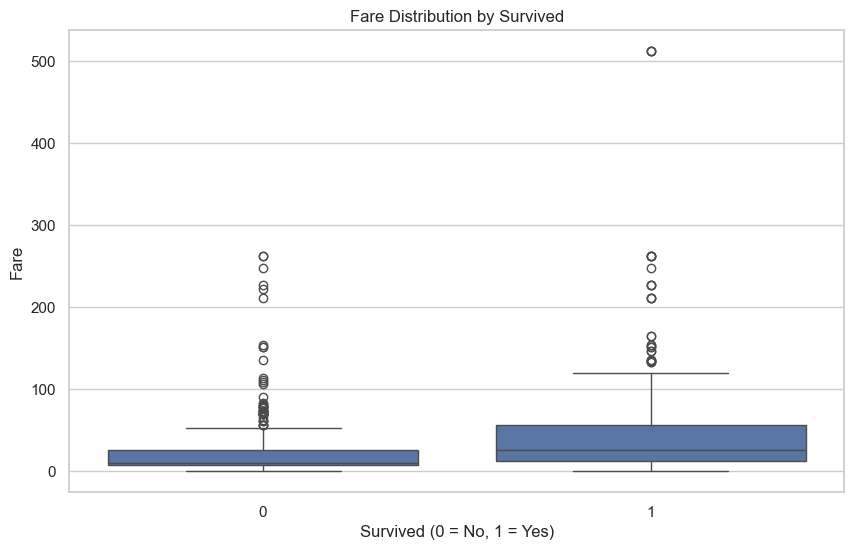

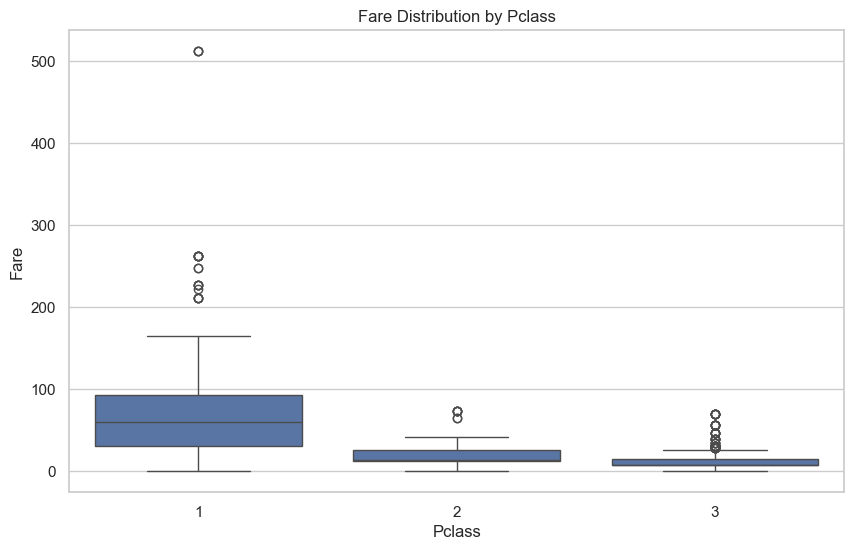

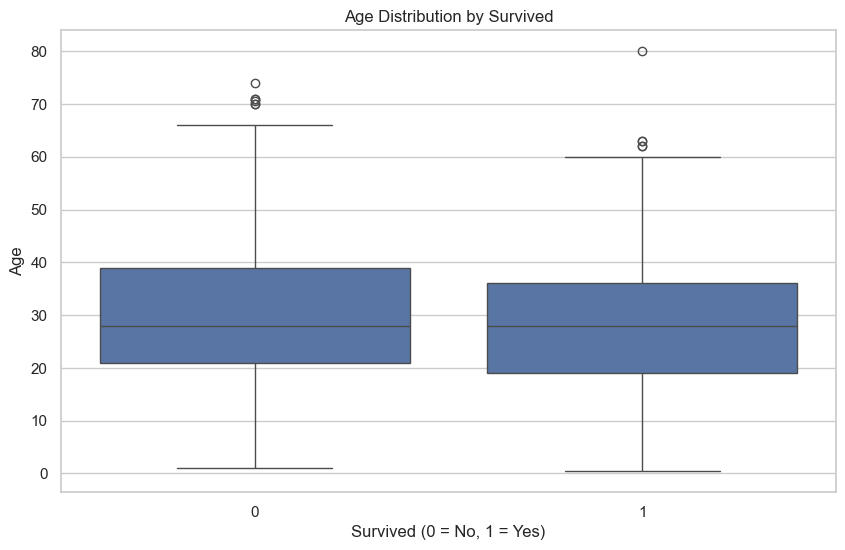

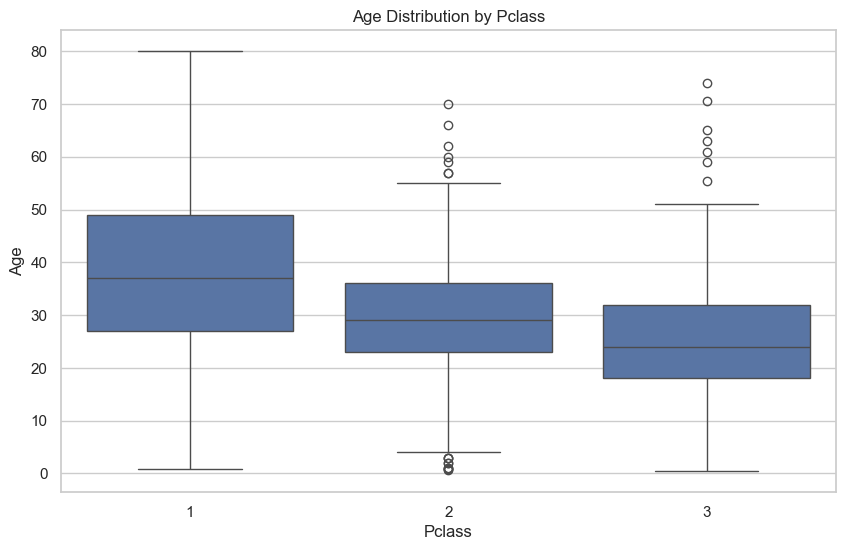

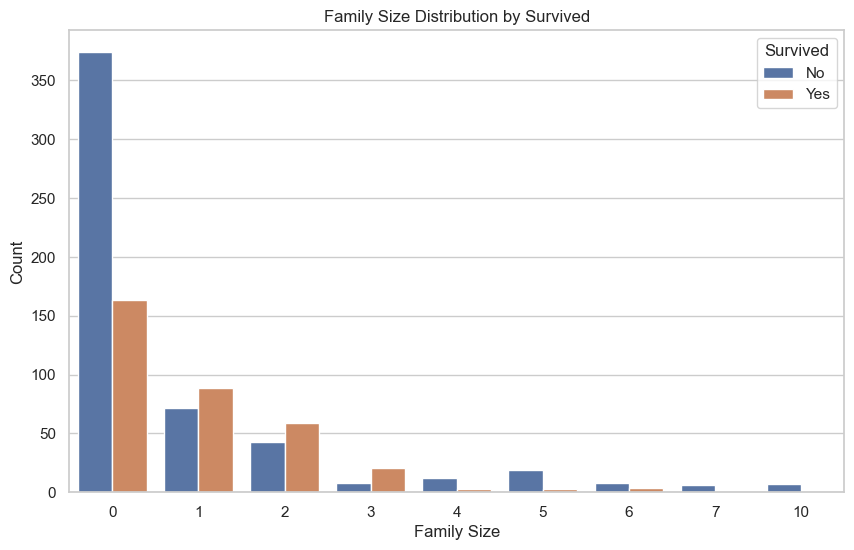

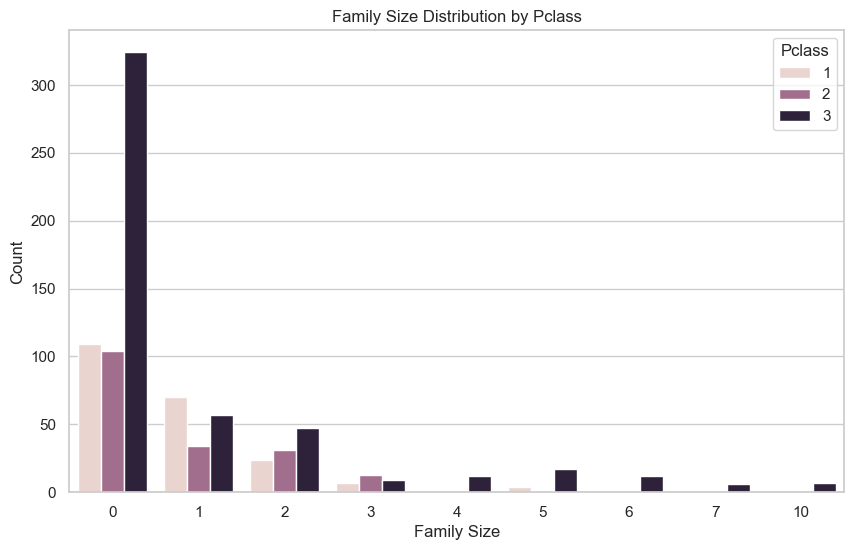

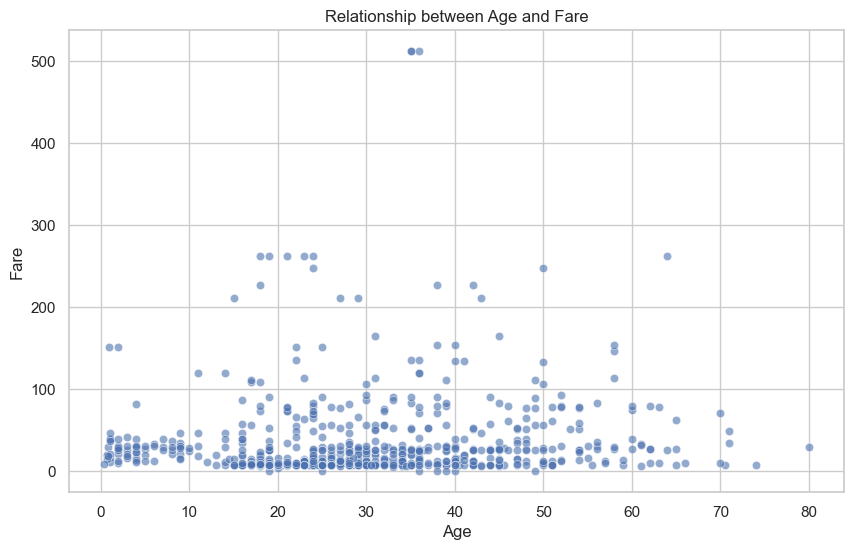

<Figure size 1000x600 with 0 Axes>

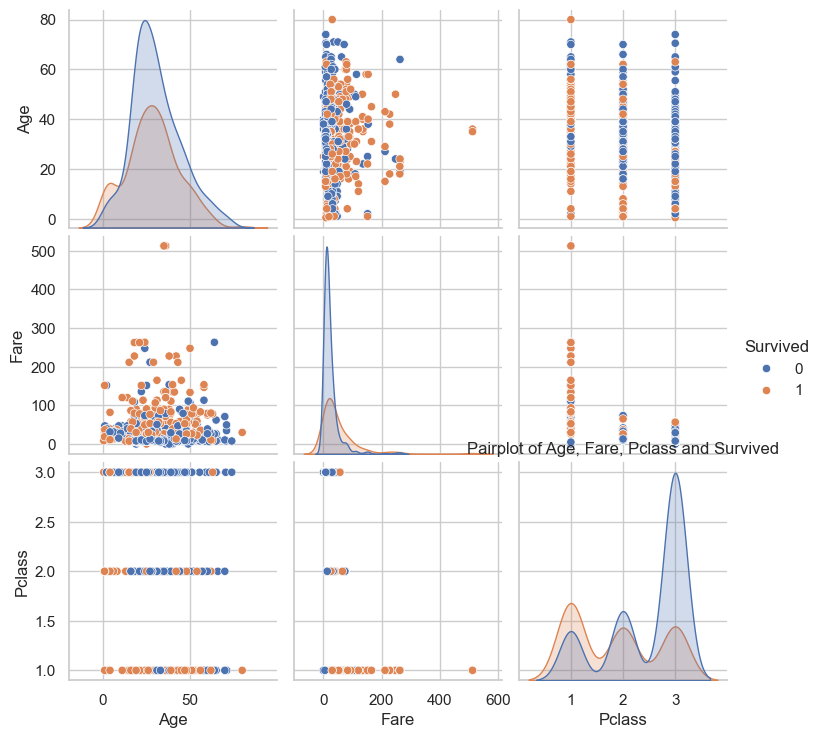

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 
df = pd.read_csv(url)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

df['Family_Size'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', hue='Survived', data=df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', hue='Pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.title('Pairplot of Age, Fare, Pclass and Survived')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
Correlation between Age and Fare: 0.09668842218036486


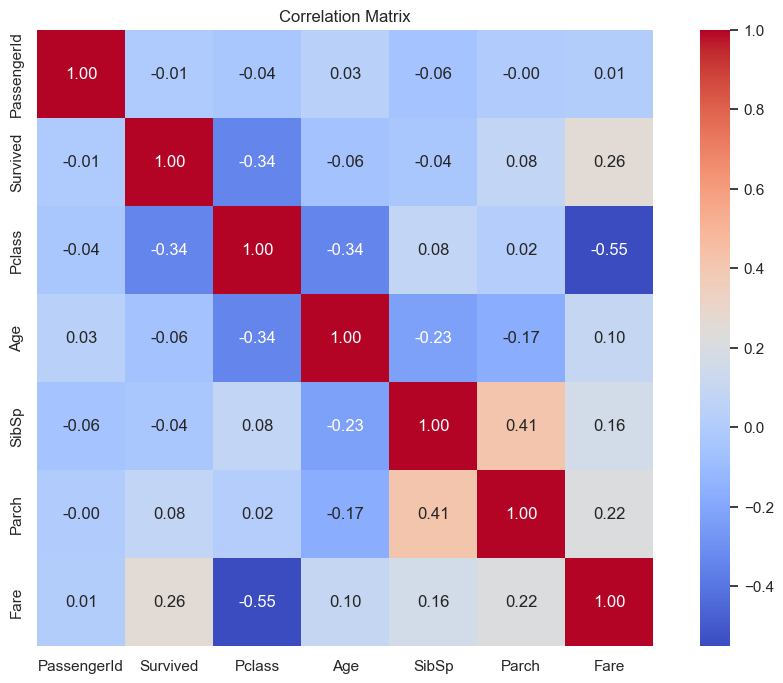

Possible correlations (absolute value > 0.3):
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId          1.0       NaN       NaN       NaN       NaN       NaN   
Survived             NaN  1.000000 -0.338481       NaN       NaN       NaN   
Pclass               NaN -0.338481  1.000000 -0.339898       NaN       NaN   
Age                  NaN       NaN -0.339898  1.000000       NaN       NaN   
SibSp                NaN       NaN       NaN       NaN  1.000000  0.414838   
Parch                NaN       NaN       NaN       NaN  0.414838  1.000000   
Fare                 NaN       NaN -0.549500       NaN       NaN       NaN   

               Fare  
PassengerId     NaN  
Survived        NaN  
Pclass      -0.5495  
Age             NaN  
SibSp           NaN  
Parch           NaN  
Fare         1.0000  


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 
df = pd.read_csv(url)

df['Fare'] = pd.to_numeric(df['Fare'].replace({'\$': '', ' ' : ''}, regex=True), errors='coerce')

df['Age'] = df['Age'].fillna(df['Age'].median())  
df['Fare'] = df['Fare'].fillna(df['Fare'].median())  

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

age_fare_correlation = df['Age'].corr(df['Fare'])
print(f'Correlation between Age and Fare: {age_fare_correlation}')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

possible_correlations = correlation_matrix[correlation_matrix.abs() > 0.3] 
print("Possible correlations (absolute value > 0.3):")
print(possible_correlations)
